Loan approval is a crucial process for financial institutions, ensuring a balance between customer satisfaction and risk management. This project leverages machine learning techniques to predict loan approvals by analyzing applicant profiles, credit history, and other critical financial attributes.

The dataset, sourced from Kaggle, contains over 58,000 entries of loan applications, enriched with features like income, employment length, loan purpose, and credit history length. The objective is to build a robust prediction model with an accuracy of at least 90%, identifying factors that significantly influence loan approvals.

By employing advanced algorithms such as Logistic Regression, Random Forest, and XGBoost, this project demonstrates how data-driven approaches can optimize decision-making, reduce default risks, and enhance the efficiency of loan processing.

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📂 Importing Essential Libraries
    </h2>
</div>

In [219]:
import numpy as np
import pandas as pd

# Graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns

# just to avoid unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold


# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

## Cross-Validation
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV

## Error Metrics
# To calculate Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve

# AUC-ROC
from sklearn.metrics import roc_curve, roc_auc_score

# Gains and lift Chart
from dmba import gainsChart, liftChart

# Confusion Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        ⬇️ Loading Dataset
    </h2>
</div>

In [220]:
data = pd.read_csv("dataset/train.csv")

In [221]:
train = data.copy()

In [222]:
train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [223]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🔍 Looking for Missing Values
    </h2>
</div>

In [224]:
pd.DataFrame(train.isnull().sum(), columns=['Missing Values'])


,Missing Values
id,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0


The dataset does not contain any null values.

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        👯‍♀️ Counting Duplicate Records
    </h2>
</div>

In [225]:
train.duplicated().sum()

0

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📊 Summary Statistics
    </h2>
</div>

In [226]:
train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🔢 Counting Unique Value of Features
    </h2>
</div>

In [227]:
unique = train.nunique().sort_values()
unique_values = train.apply(lambda x: x.unique())
result = pd.DataFrame({
    'Number of Unique Values': unique, 
    'Unique Values': unique_values
})
result

,Number of Unique Values,Unique Values
cb_person_cred_hist_length,29,"[14, 2, 10, 5, 3, 11, 6, 9, 7, 8, 4, 17, 13, 1..."
cb_person_default_on_file,2,"[N, Y]"
id,58645,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
loan_amnt,545,"[6000, 4000, 12000, 9000, 2500, 5000, 15000, 1..."
loan_grade,7,"[B, C, A, D, E, F, G]"
loan_int_rate,362,"[11.49, 13.35, 8.9, 11.11, 6.92, 8.94, 6.54, 1..."
loan_intent,6,"[EDUCATION, MEDICAL, PERSONAL, VENTURE, DEBTCO..."
loan_percent_income,61,"[0.17, 0.07, 0.21, 0.1, 0.2, 0.27, 0.13, 0.14,..."
loan_status,2,"[0, 1]"
person_age,53,"[37, 22, 29, 30, 27, 25, 21, 35, 31, 26, 28, 3..."


<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🔗 Correlation Heatmap between the Variables
    </h2>
</div>

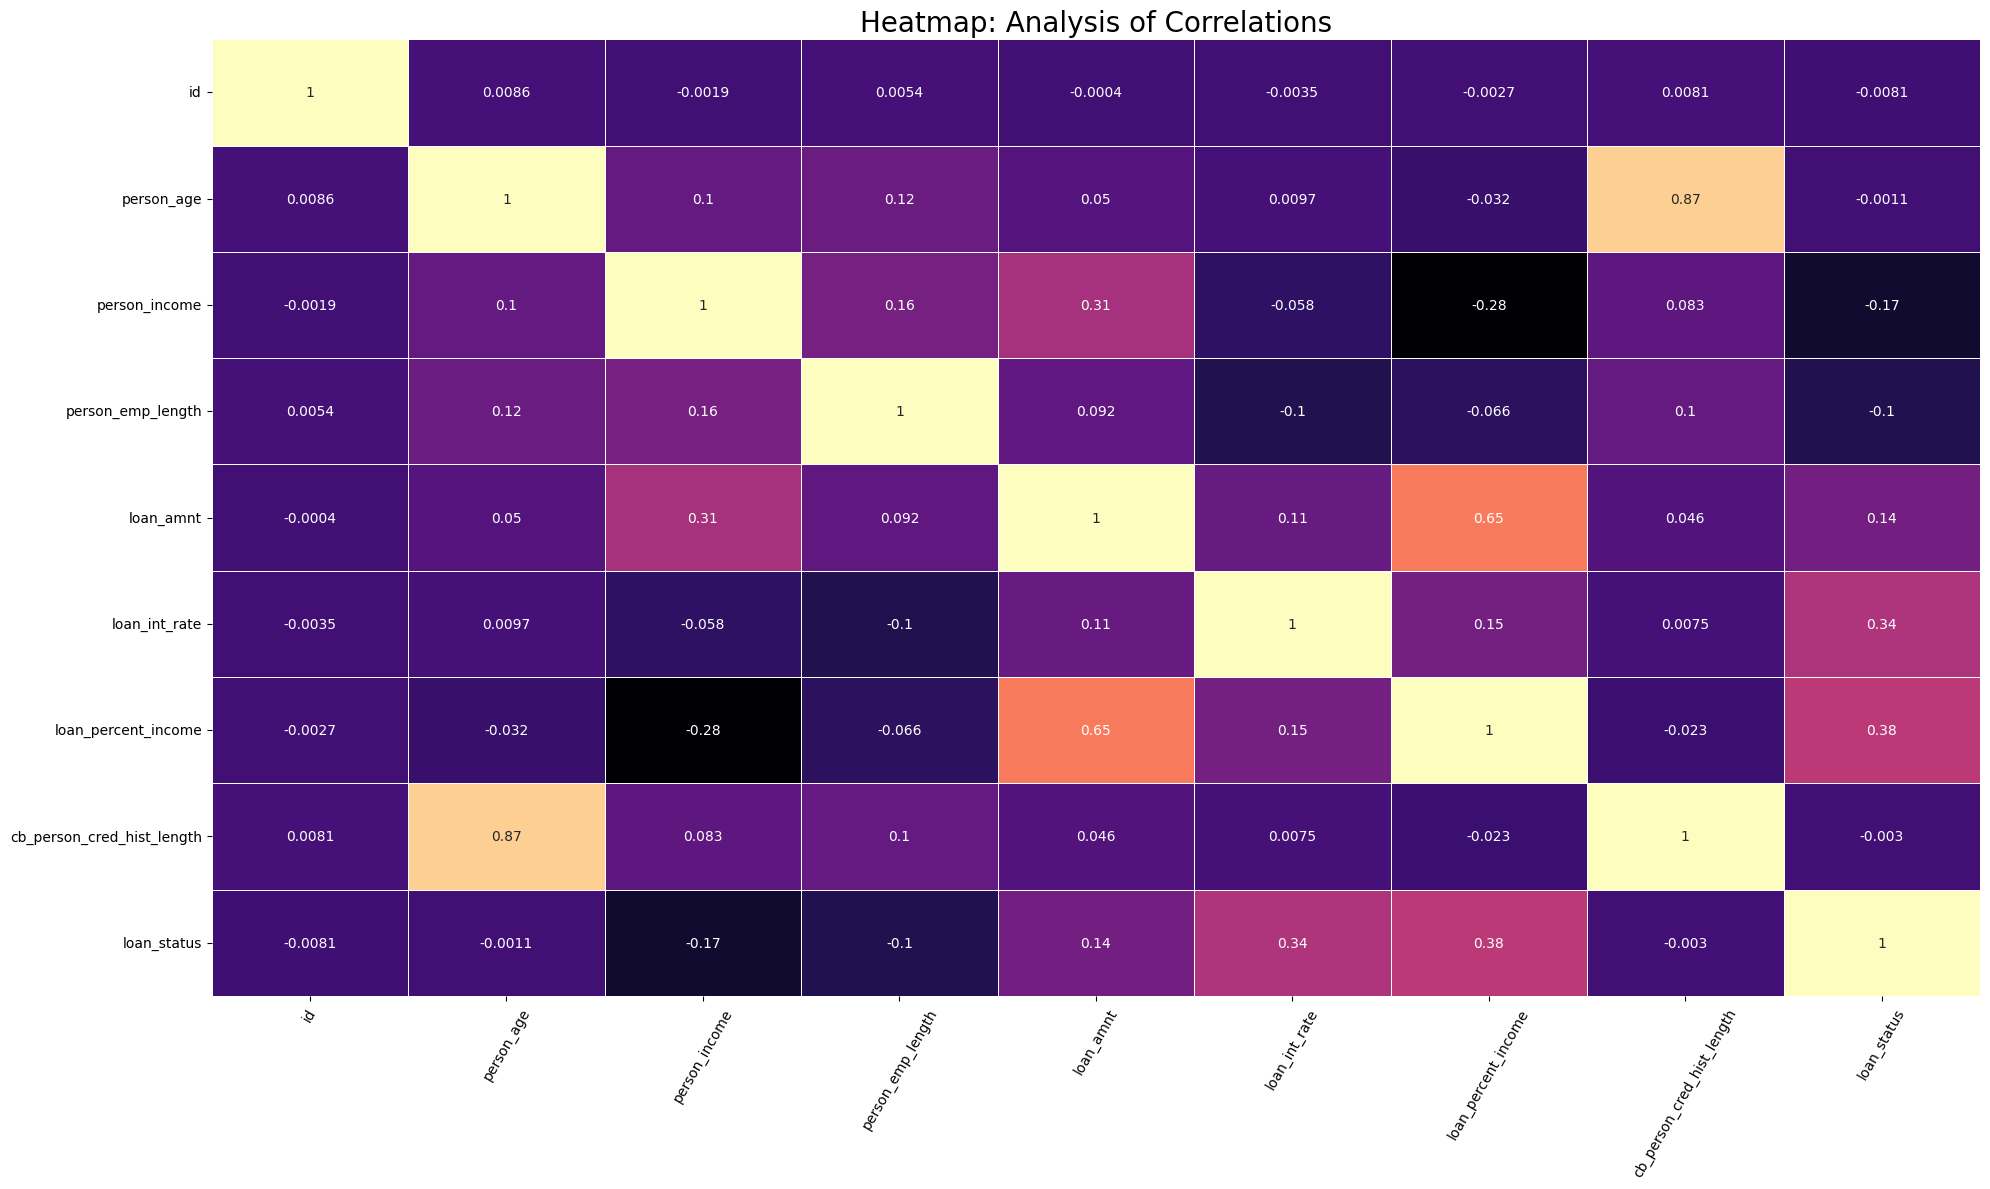

In [228]:
plt.figure(figsize=(20, 12))
sns.heatmap(
    train.corr(numeric_only=True), 
    cmap="magma", 
    annot=True, 
    linewidths=.6, 
    cbar=False
)
plt.xticks(rotation=60, size=10)
plt.yticks(size=10)
plt.title('Heatmap: Analysis of Correlations', size=20)
plt.tight_layout()
plt.show()

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📊 Distribution of Target Variable loan_status
    </h2>
</div>

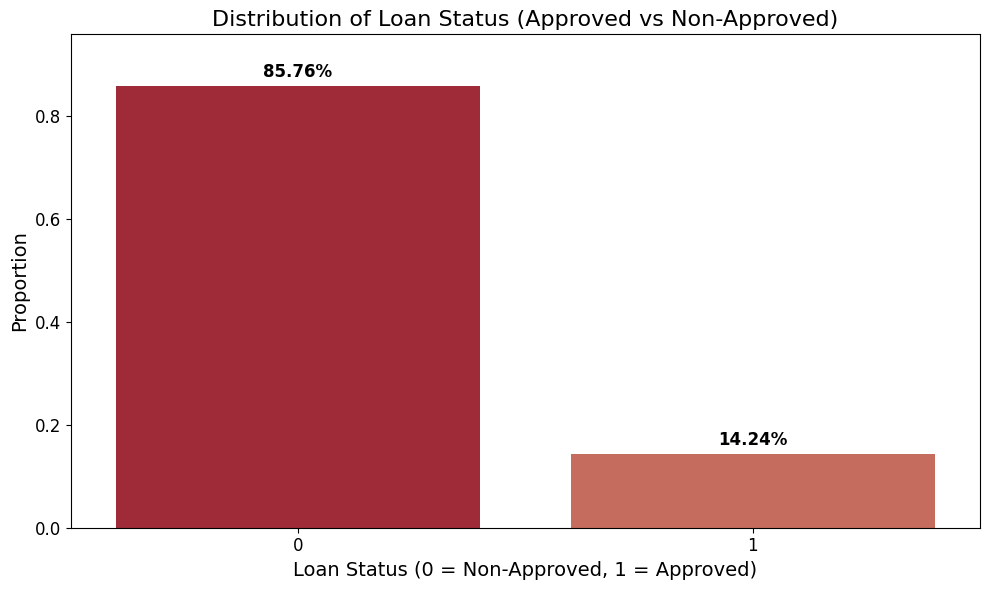

In [229]:
loan_status_distribution = train['loan_status'].value_counts(normalize=True).reset_index()
loan_status_distribution.columns = ['loan_status', 'proportion']

# Map loan status to colors
rdgy_colors = {0: '#B2182B', 1: '#D6604D'}
loan_status_distribution['color'] = loan_status_distribution['loan_status'].map(rdgy_colors)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=loan_status_distribution,
    x='loan_status',
    y='proportion',
    palette=rdgy_colors
)

# Add text annotations
for i, row in loan_status_distribution.iterrows():
    plt.text(
        x=i, 
        y=row['proportion'] + 0.01,  # Position above the bar
        s=f"{row['proportion']:.2%}",  # Convert proportion to percentage
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold'
    )

# Customize plot appearance
plt.title('Distribution of Loan Status (Approved vs Non-Approved)', fontsize=16)
plt.xlabel('Loan Status (0 = Non-Approved, 1 = Approved)', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.ylim(0, loan_status_distribution['proportion'].max() + 0.1)  # Add some padding above bars
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📊 Distribution of Categorical Features
    </h2>
</div>

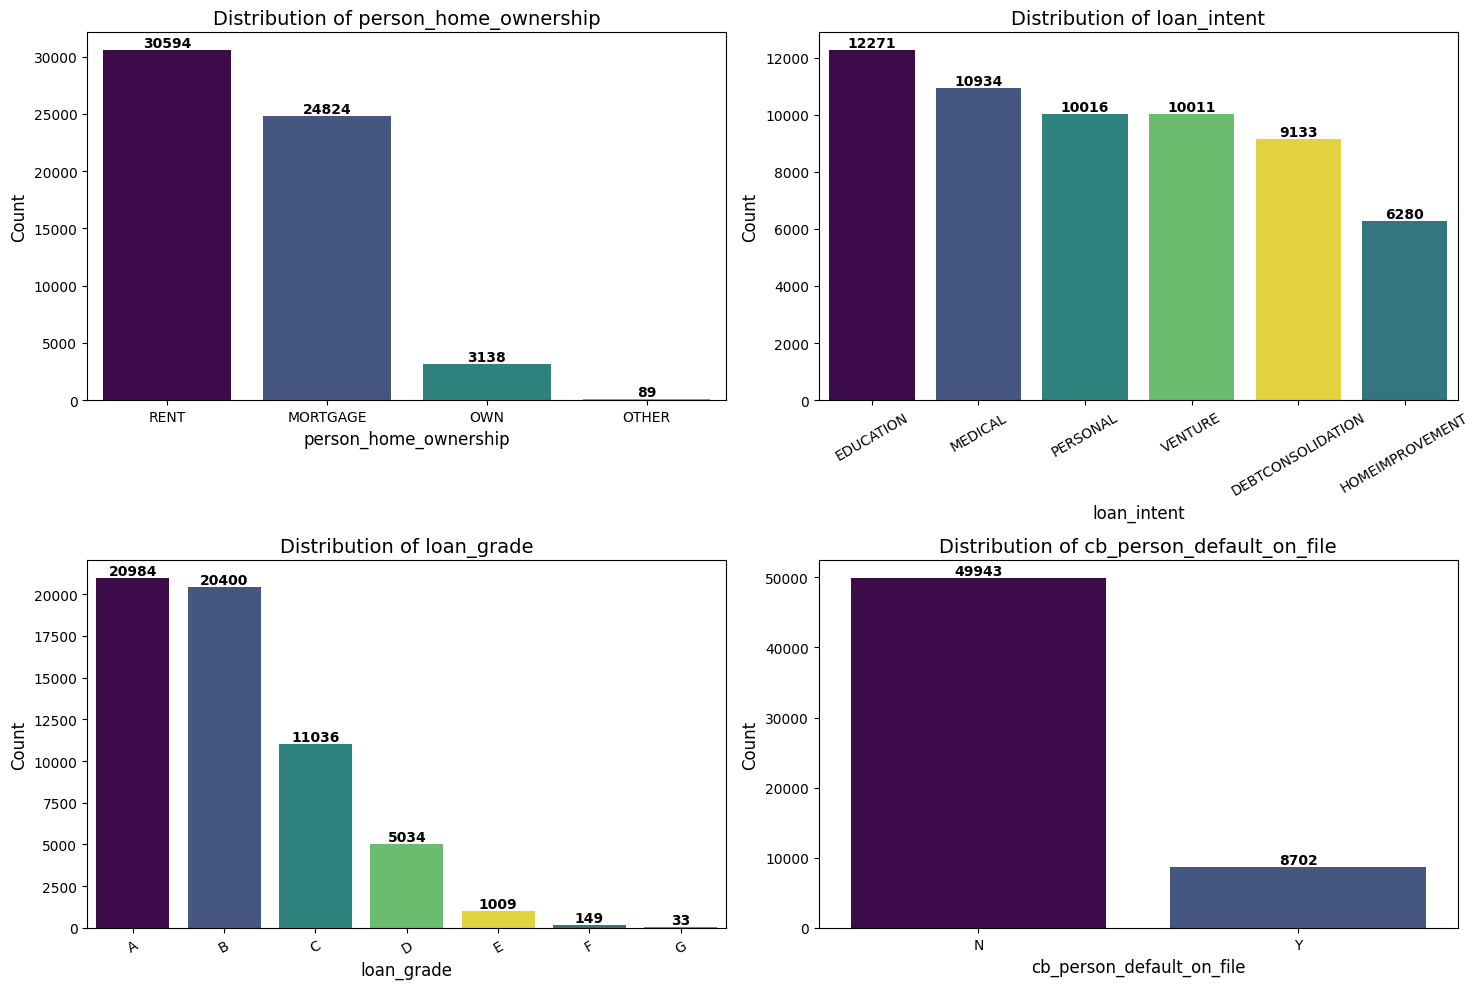

In [230]:
viridis_color_sequence = [
    '#440154', '#3B528B', '#21918C', '#5EC962', 
    '#FDE725', '#287D8E', '#35B779'
]

# List of categorical columns
categorical_columns = [
    'person_home_ownership', 
    'loan_intent', 
    'loan_grade', 
    'cb_person_default_on_file'
]

# Number of rows and columns
n_cols = 2
n_rows = -(-len(categorical_columns) // n_cols)  # Calculate rows needed (ceil division)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each categorical column
for i, column in enumerate(categorical_columns):
    # Calculate value counts
    value_counts = train[column].value_counts().reset_index()
    value_counts.columns = [column, 'Count']
    
    # Create a color palette with as many colors as unique values
    unique_values = len(value_counts[column].unique())
    palette = viridis_color_sequence[:unique_values]
    
    # Plot using Seaborn
    sns.barplot(
        data=value_counts,
        x=column,
        y='Count',
        palette=palette,
        ax=axes[i]
    )
    
    # Add annotations
    for j, row in value_counts.iterrows():
        axes[i].text(
            x=j, 
            y=row['Count'] + 0.5,  # Position above the bar
            s=row['Count'],  # Display the count
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )
    
    # Customize plot
    axes[i].set_title(f'Distribution of {column}', fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].tick_params(axis='x', rotation=30 if unique_values > 5 else 0)

# Turn off any unused axes if columns are less than the grid size
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📊 Correlation Heatmap between Numerical Features
    </h2>
</div>

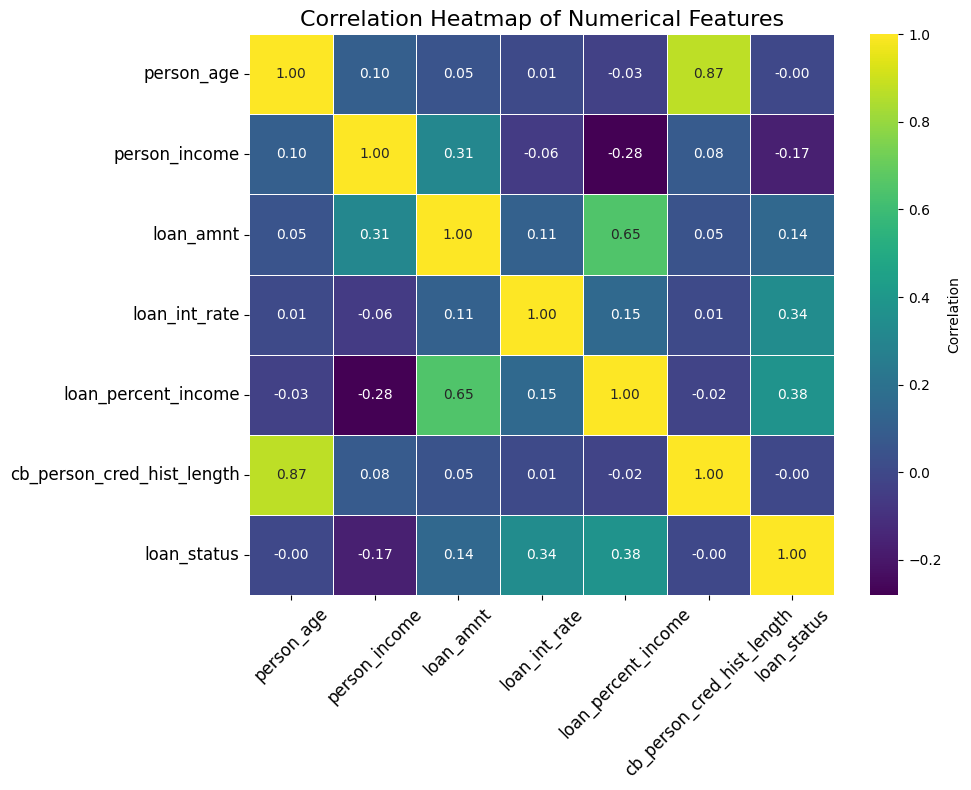

In [231]:
# List of numerical columns
numerical_columns = [
    'person_age', 
    'person_income', 
    'loan_amnt', 
    'loan_int_rate', 
    'loan_percent_income', 
    'cb_person_cred_hist_length', 
    'loan_status'
]

# Calculate the correlation matrix
correlation_matrix = train[numerical_columns].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Display the correlation values
    fmt=".2f",   # Format the numbers to two decimal places
    cmap="viridis",  # Use the viridis color map
    cbar_kws={'label': 'Correlation'},  # Label for the color bar
    linewidths=0.5  # Add lines between cells for better readability
)

# Customize plot
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📊 Analyzing Credit History & Default Status vs Loan Approval
    </h2>
</div>

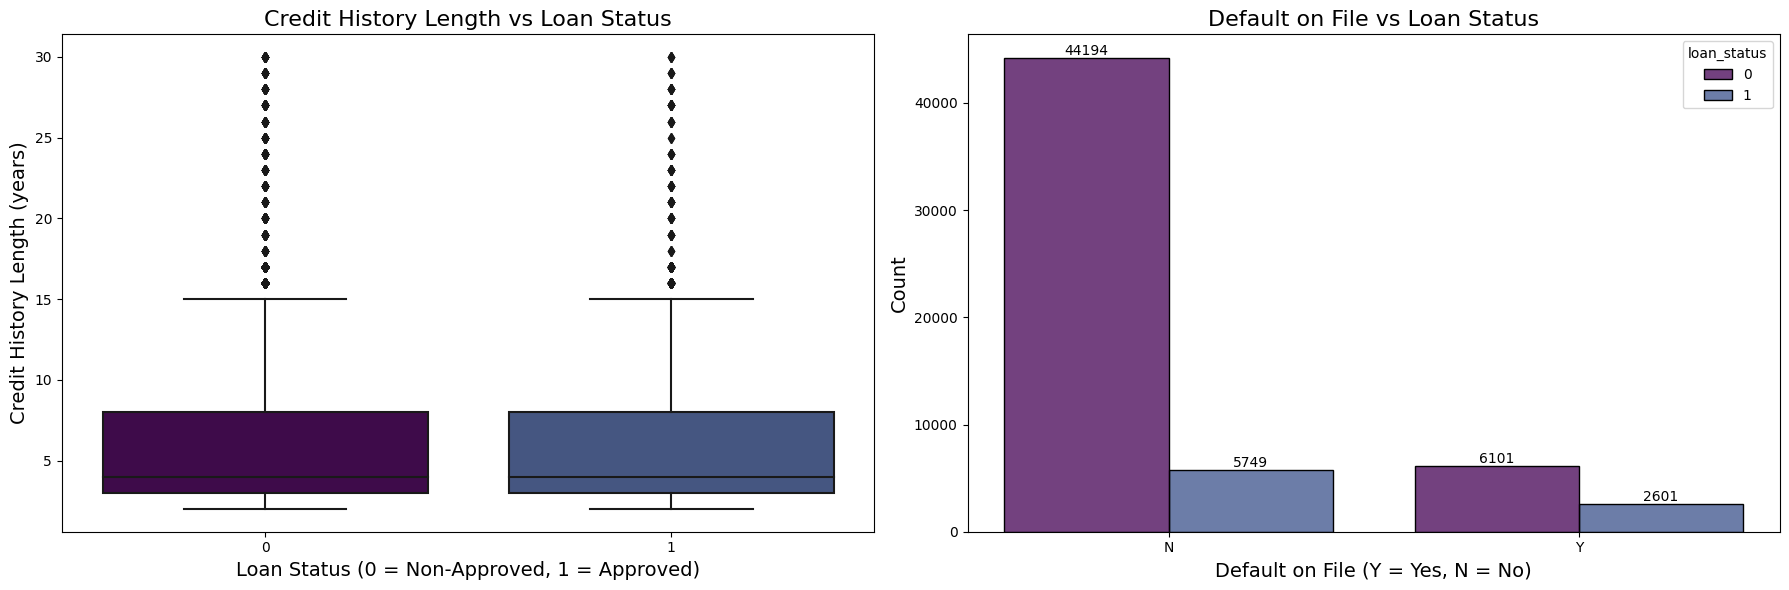

In [232]:
# Define color palette
viridis_colors = {
    0: '#440154', 
    1: '#3B528B'  
}

# Create a figure with two subplots in one row
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # (1 row, 2 columns)

# Boxplot: Credit History Length vs Loan Status
sns.boxplot(
    data=train,
    x='loan_status',
    y='cb_person_cred_hist_length',
    palette=viridis_colors,
    ax=axes[0]  # Specify the subplot
)

# Annotate whisker values
for i, artist in enumerate(axes[0].artists):
    # Get the y-coordinates of the whiskers
    whisker_min = artist.get_ydata()[0]  # Bottom whisker
    whisker_max = artist.get_ydata()[3]  # Top whisker
    
    # Get the x-coordinate of the box (use the index of the group)
    x_coord = artist.get_xdata()[0]
    
    # Annotate the whiskers
    axes[0].text(
        x_coord, whisker_min - 0.5,  # Position slightly below the bottom whisker
        f'{whisker_min:.2f}',  # Format the number
        ha='center', va='top', fontsize=10, color='black'
    )
    axes[0].text(
        x_coord, whisker_max + 0.5,  # Position slightly above the top whisker
        f'{whisker_max:.2f}',  # Format the number
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Set title and labels for the boxplot
axes[0].set_title("Credit History Length vs Loan Status", fontsize=16)
axes[0].set_xlabel('Loan Status (0 = Non-Approved, 1 = Approved)', fontsize=14)
axes[0].set_ylabel('Credit History Length (years)', fontsize=14)
axes[0].tick_params(axis='x', rotation=0)

# Histogram: Default on File vs Loan Status
sns.histplot(
    data=train,
    x='cb_person_default_on_file',
    hue='loan_status',
    multiple='dodge',  # Grouped bar chart
    palette=viridis_colors,
    shrink=0.8,  # Adjust bar width
    ax=axes[1]  # Specify the subplot
)

# Add value labels on top of each bar
for bar in axes[1].patches:
    height = bar.get_height()
    if height > 0:
        axes[1].text(
            x=bar.get_x() + bar.get_width() / 2,  # Center the label horizontally
            y=height + 0.5,  # Position slightly above the bar
            s=f'{int(height)}',  # Convert height to integer
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set title and labels for the histogram
axes[1].set_title("Default on File vs Loan Status", fontsize=16)
axes[1].set_xlabel('Default on File (Y = Yes, N = No)', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].tick_params(axis='x', rotation=0)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📊 Analyzing Employment Length and Loan Status
    </h2>
</div>

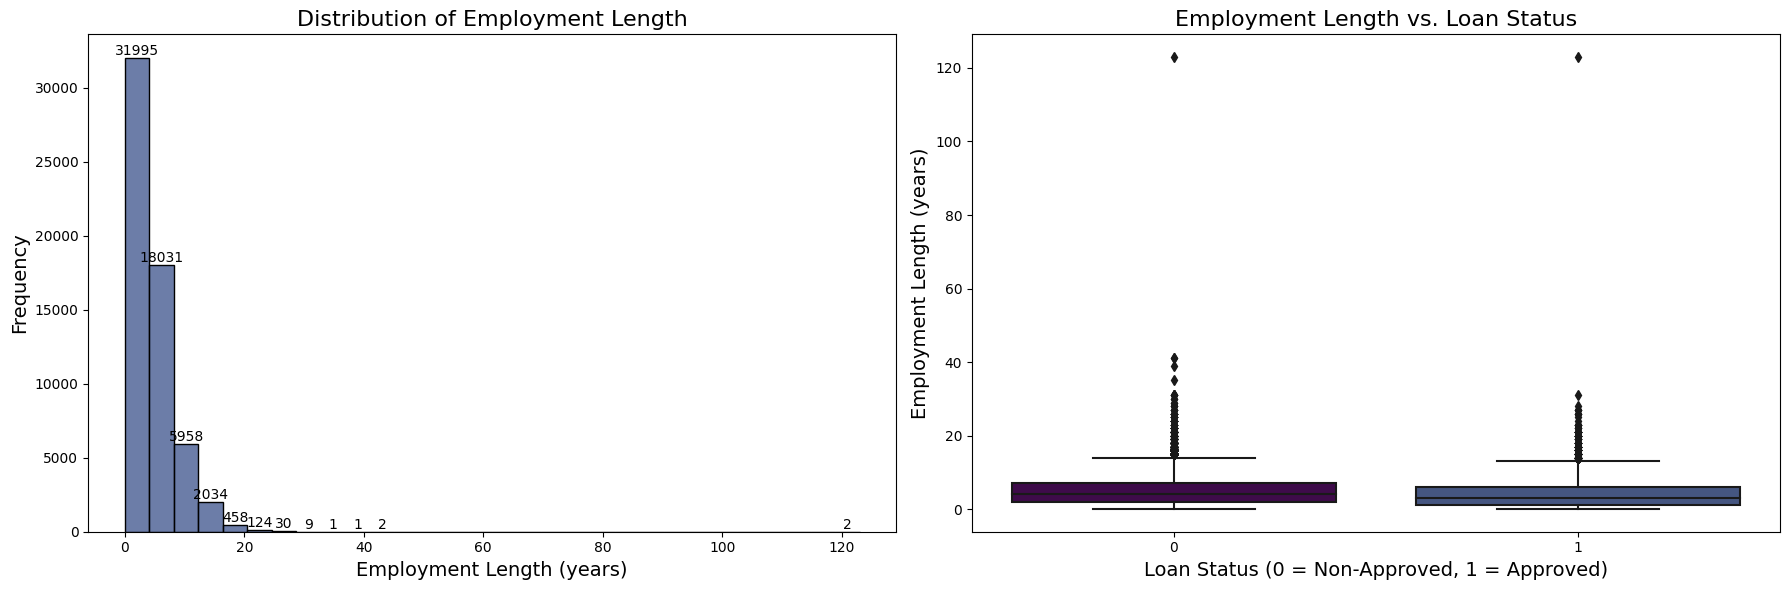

In [233]:
# Define color palette
viridis_colors = {
    0: '#440154', 
    1: '#3B528B'  
}

# Create a figure with two subplots in one row
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # (1 row, 2 columns)

# Histogram: Distribution of Employment Length
sns.histplot(
    data=train,
    x='person_emp_length',
    bins=30,
    kde=False,  # Disable the kernel density estimate
    color='#3B528B',  # Color for the bars
    ax=axes[0]  # Specify the subplot
)

# Add value labels on top of each bar
for bar in axes[0].patches:
    height = bar.get_height()
    if height > 0:
        axes[0].text(
            x=bar.get_x() + bar.get_width() / 2,  # Position horizontally at the center of the bar
            y=height + 0.5,  # Position slightly above the bar
            s=f'{int(height)}',  # Convert height to integer and display it
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set title and labels for the histogram
axes[0].set_title("Distribution of Employment Length", fontsize=16)
axes[0].set_xlabel('Employment Length (years)', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)
axes[0].tick_params(axis='x', rotation=0)
axes[0].tick_params(axis='y', rotation=0)

# Boxplot: Employment Length vs Loan Status
sns.boxplot(
    data=train,
    x='loan_status',
    y='person_emp_length',
    palette=viridis_colors,
    ax=axes[1]  # Specify the subplot
)

# Set title and labels for the boxplot
axes[1].set_title("Employment Length vs. Loan Status", fontsize=16)
axes[1].set_xlabel('Loan Status (0 = Non-Approved, 1 = Approved)', fontsize=14)
axes[1].set_ylabel('Employment Length (years)', fontsize=14)
axes[1].tick_params(axis='x', rotation=0)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🏠 Home Ownership vs Loan Approval Status
    </h2>
</div>

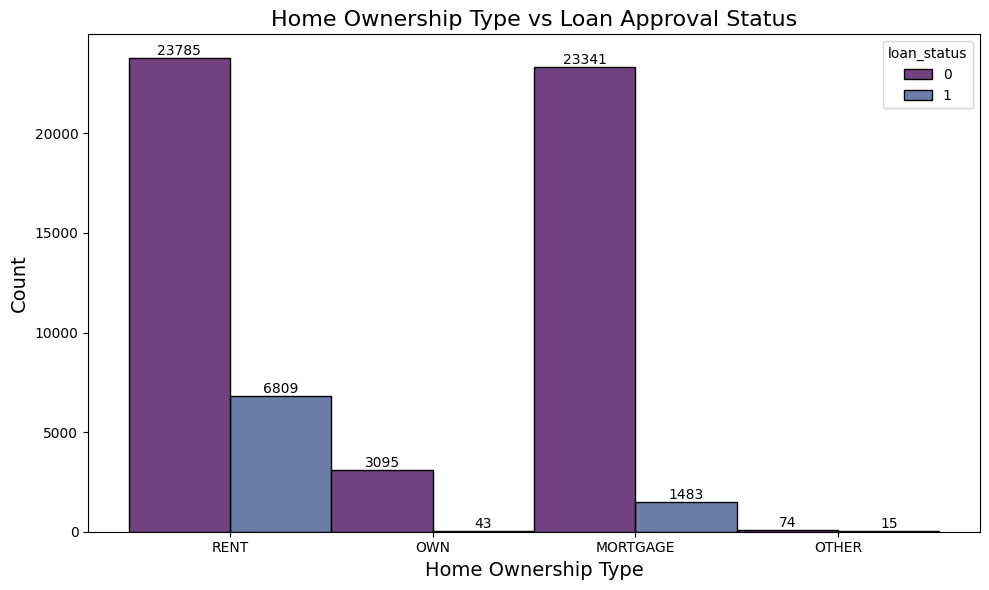

In [234]:
# Define color palette
viridis_colors = {
    0: '#440154',  
    1: '#3B528B'  
}

# Create a figure with a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Histogram: Home Ownership Type vs Loan Approval Status
sns.histplot(
    data=train,
    x='person_home_ownership',
    hue='loan_status',  # Coloring by loan status
    multiple='dodge',  # Group the bars
    palette=viridis_colors,  # Use the color palette for loan_status
    ax=ax  # Specify the subplot
)

# Add value labels on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            x=bar.get_x() + bar.get_width() / 2,  # Position horizontally at the center of the bar
            y=height + 0.5,  # Position slightly above the bar
            s=f'{int(height)}',  # Convert height to integer and display it
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Set title and labels for the histogram
ax.set_title("Home Ownership Type vs Loan Approval Status", fontsize=16)
ax.set_xlabel('Home Ownership Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(axis='x', rotation=0)
ax.tick_params(axis='y', rotation=0)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        💰 Loan Amount Distribution by Loan Status
    </h2>
</div>

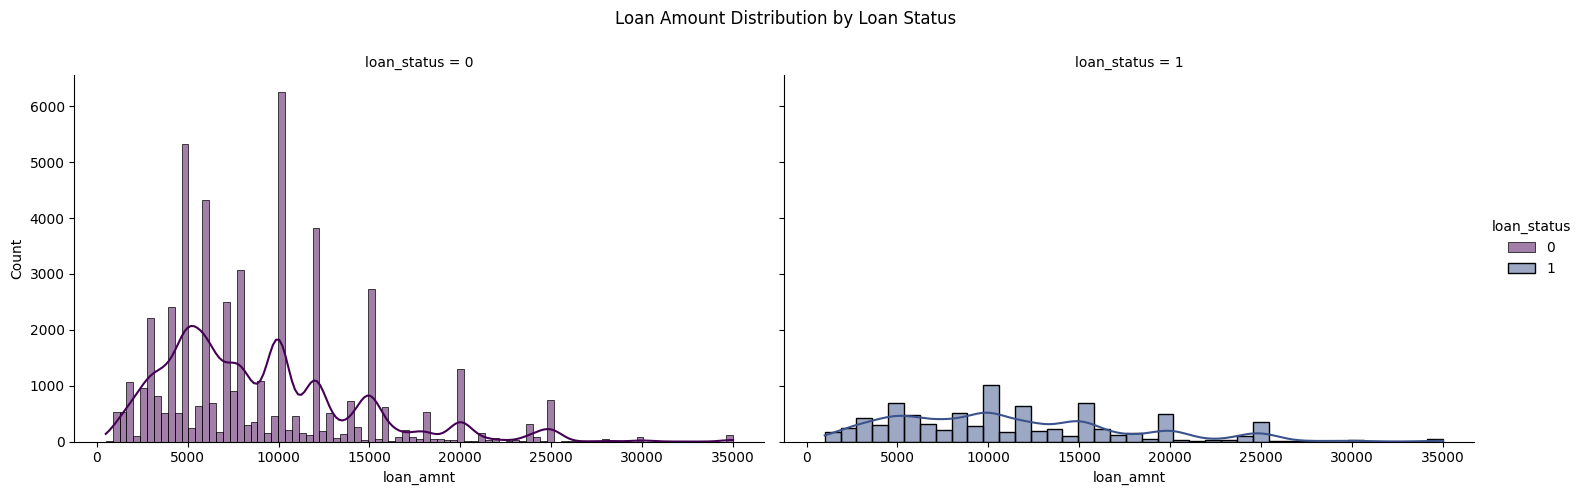

In [235]:
# Define color palette
viridis_colors = {
    0: '#440154',  
    1: '#3B528B'  
}

# Create a FacetGrid for loan_status with a histogram and KDE for loan_amnt
g = sns.FacetGrid(train, col="loan_status", hue="loan_status", height=5, aspect=1.5, palette=viridis_colors)
g.map(sns.histplot, 'loan_amnt', kde=True)

# Add legend and title
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Loan Amount Distribution by Loan Status')

# Show the plot
plt.show()

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🏠 Home Ownership vs Loan Approval Status
    </h2>
</div>

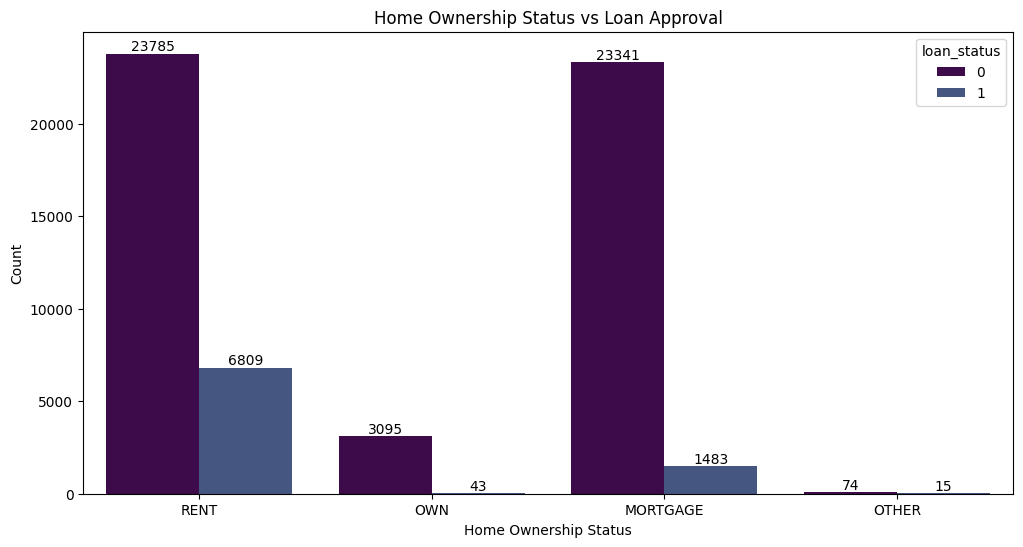

loan_status                 0       1
person_home_ownership                
MORTGAGE               94.03%   5.97%
OTHER                  83.15%  16.85%
OWN                    98.63%   1.37%
RENT                   77.74%  22.26%


In [236]:
# Define color palette
viridis_colors = {
    0: '#440154',  
    1: '#3B528B'   
}

# Create the count plot for Home Ownership vs Loan Approval
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='person_home_ownership', hue='loan_status', data=train, palette=viridis_colors)

# Add title and labels
plt.title('Home Ownership Status vs Loan Approval')
plt.xlabel('Home Ownership Status')
plt.ylabel('Count')

# Add value labels on top of the bars
for bar in ax.patches:
    height = bar.get_height()  # Get the height of each bar
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # Position horizontally at the center of the bar
            height + 0.2,  # Position slightly above the bar
            f'{int(height)}',  # Convert height to integer and display it
            ha='center', va='bottom', fontsize=10, color='black'
        )

# Show the plot
plt.show()

# Calculate the distribution of loan status within home ownership categories
home_ownership_dist = train.groupby('person_home_ownership')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
home_ownership_dist = home_ownership_dist.applymap(lambda x: f"{x * 100:.2f}%")
print(home_ownership_dist)

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        📊 Box Plots for Numerical Features
    </h2>
</div>

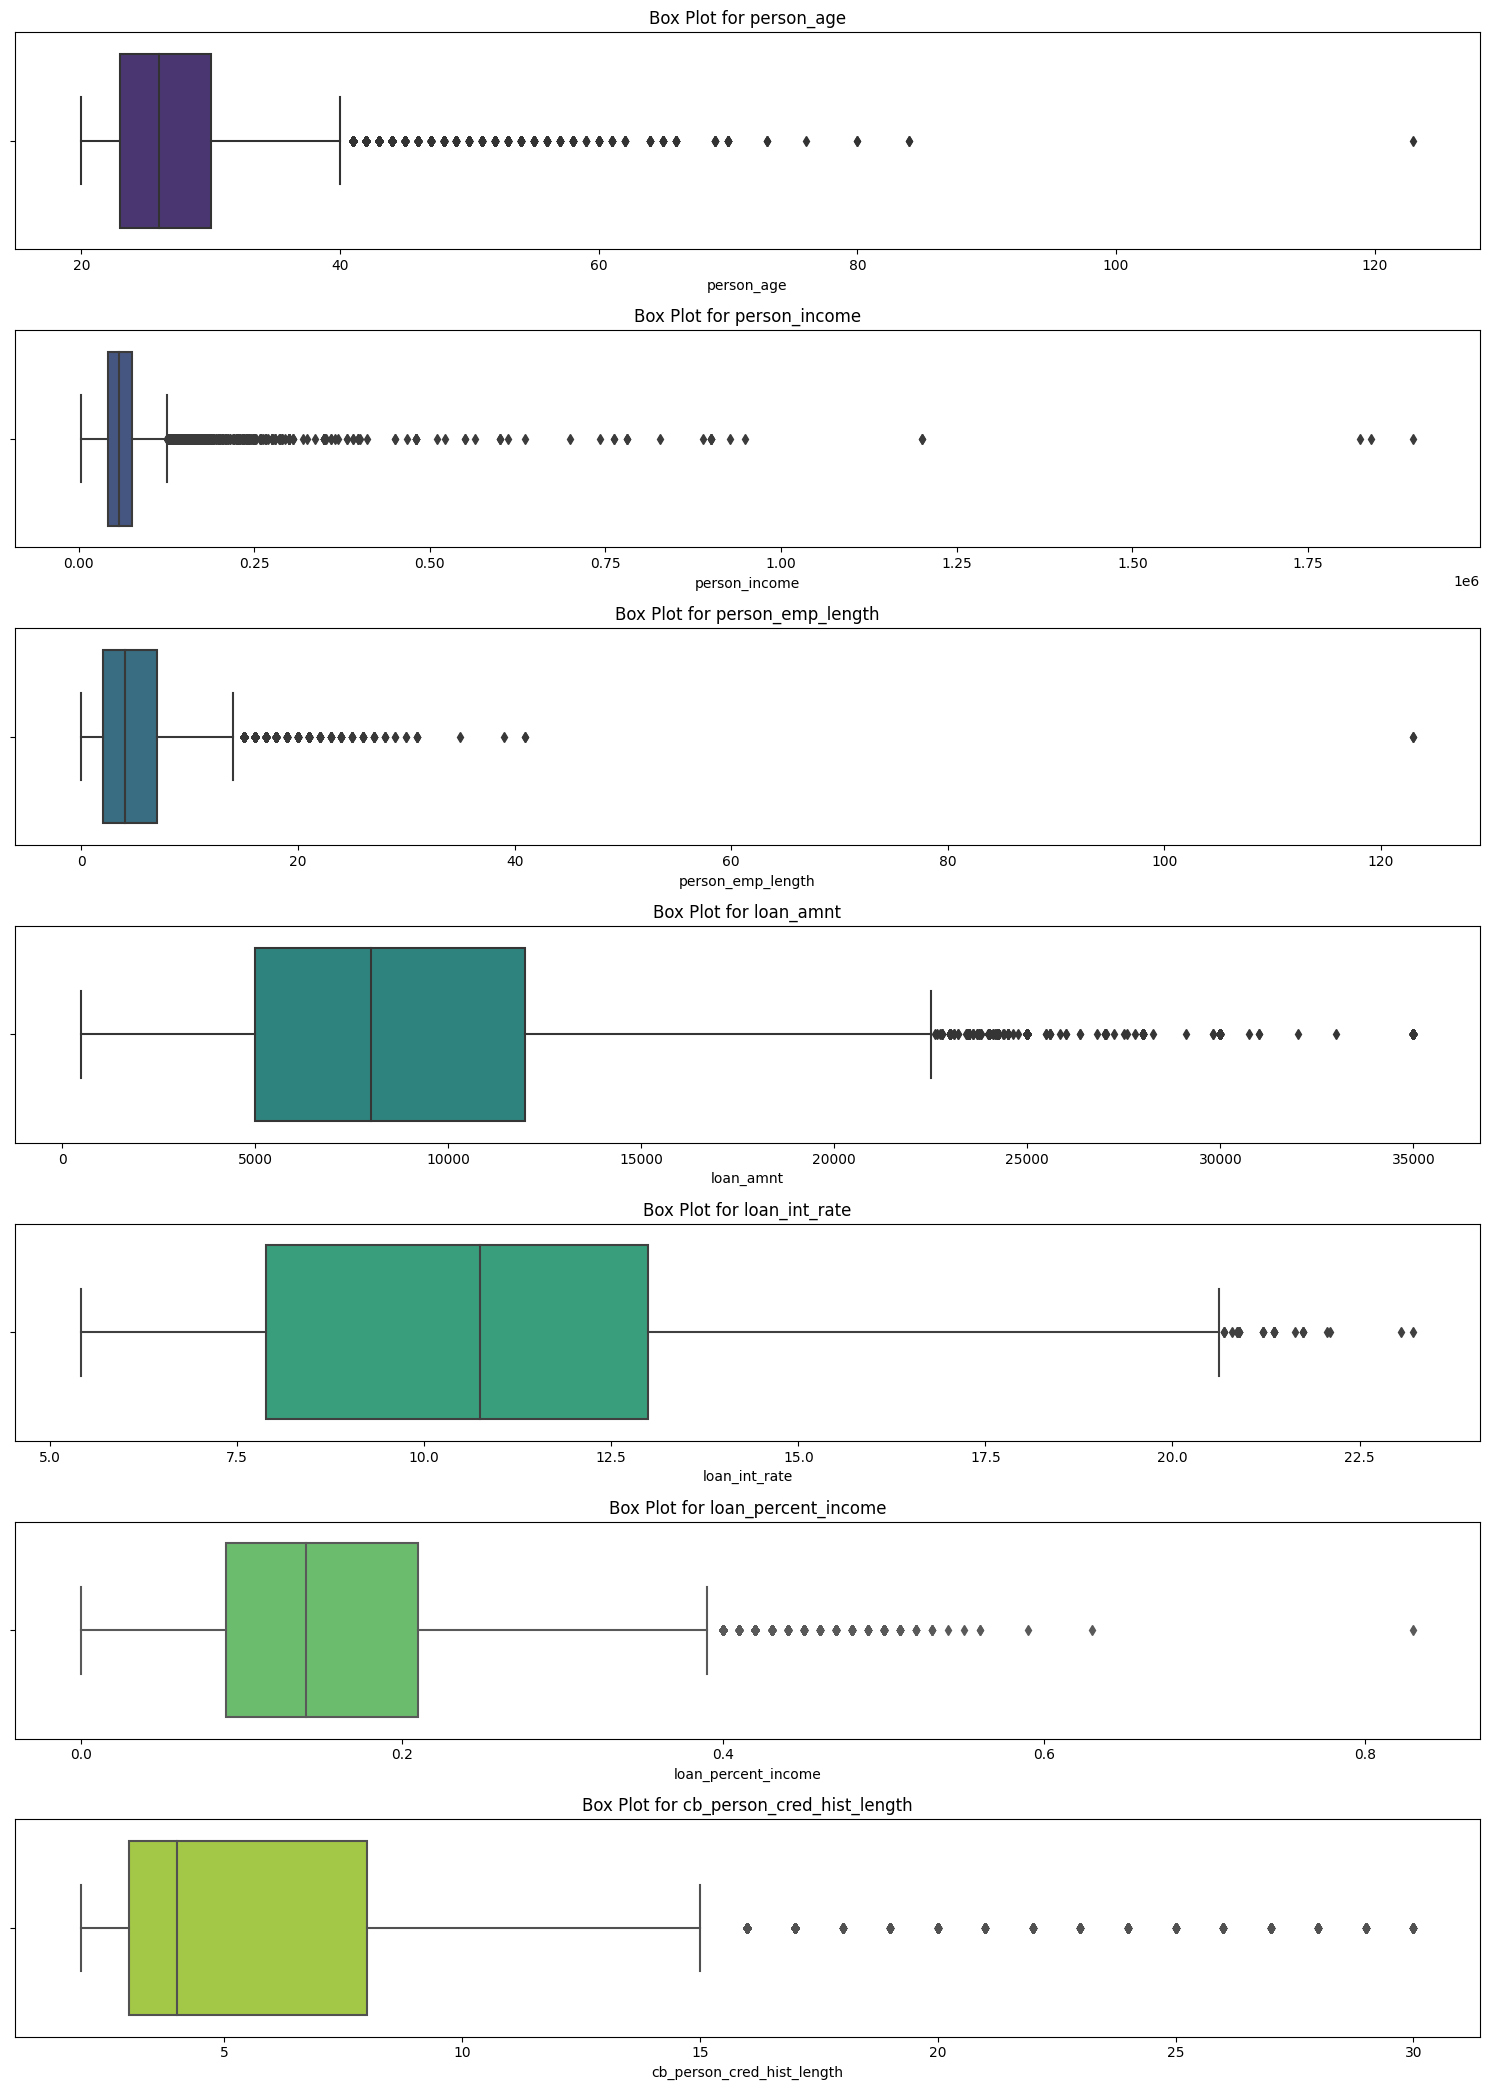

In [237]:
numerical_cols = [col for col in train.select_dtypes(include=['float64', 'int64']).columns[1:] if col != 'loan_status']
plt.figure(figsize=(15, len(numerical_cols) * 3))
palette = sns.color_palette("viridis", len(numerical_cols))
for i, (col, color) in enumerate(zip(numerical_cols, palette), 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=train[col], color=color)
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        ✨ Feature Engineering ⚙️
    </h2>
</div>

In [238]:
# Debt to Earnings Ratio
train['loan_to_income_ratio'] = train['loan_amnt'] / train['person_income']

# Financial Burden
train['financial_burden'] = np.ceil(train['loan_amnt'] * train['loan_int_rate'])

# Credit History to Age ratio
train['cred_hist_to_age_ratio'] = train['cb_person_cred_hist_length'] / train['person_age']

# Loan interest to credit history ratio
train['int_to_cred_hist'] = train['loan_int_rate'] / train['cb_person_cred_hist_length']  

In [239]:
new_features = ['loan_to_income_ratio', 'financial_burden', 
                'cred_hist_to_age_ratio','int_to_cred_hist']
train[new_features].describe()

,loan_to_income_ratio,financial_burden,cred_hist_to_age_ratio,int_to_cred_hist
count,58645.000000,58645.000000,58645.000000,58645.000000
mean,0.159774,100341.689914,0.196554,2.707280
std,0.094263,73598.961472,0.094593,1.773040
min,0.000789,4732.000000,0.032520,0.186897
25%,0.089286,48440.000000,0.125000,1.296250
50%,0.142276,78855.000000,0.173913,2.272000
75%,0.209302,131880.000000,0.266667,3.703333
max,3.125000,652400.000000,1.035714,10.680000


<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🚫 Removing Outliers from Numerical Features
    </h2>
</div>

In [240]:
train_no_outliers = train.copy()
def remove_outliers(train, column):
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1
    return train[(train[column] >= (Q1 - 1.5 * IQR)) & (train[column] <= (Q3 + 1.5 * IQR))]

for col in numerical_cols:
    train_no_outliers = remove_outliers(train_no_outliers, col)

train_no_outliers.reset_index(drop=True, inplace=True)

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        Dummy Variables 🔢
    </h2>
</div>

### Creating dummy variables

In [241]:
train_no_outliers = pd.get_dummies(train_no_outliers, columns = train_no_outliers.select_dtypes(include = ['object']).columns[:3], drop_first = False)
train_no_outliers

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,1,22,56000,6.0,4000,13.35,0.07,N,2,0,...,True,False,False,False,False,True,False,False,False,False
1,2,29,28800,8.0,6000,8.90,0.21,N,10,0,...,False,True,False,True,False,False,False,False,False,False
2,3,30,70000,14.0,12000,11.11,0.17,N,5,0,...,False,False,True,False,True,False,False,False,False,False
3,4,22,60000,2.0,6000,6.92,0.10,N,3,0,...,True,False,False,True,False,False,False,False,False,False
4,5,27,45000,2.0,9000,8.94,0.20,N,5,0,...,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48722,58639,22,70000,6.0,10000,7.29,0.14,N,4,0,...,False,False,False,True,False,False,False,False,False,False
48723,58641,28,28800,0.0,10000,12.73,0.35,N,8,1,...,True,False,False,False,False,True,False,False,False,False
48724,58642,23,44000,7.0,6800,16.00,0.15,N,2,1,...,False,False,False,False,False,False,True,False,False,False
48725,58643,22,30000,2.0,5000,8.90,0.17,N,3,0,...,False,False,False,True,False,False,False,False,False,False


<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        Label Encoding 🔢
    </h2>
</div>

### Label Encoding on training set

In [242]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Label encode the 'cb_person_default_on_file' column
train_no_outliers['cb_person_default_on_file'] = label_encoder.fit_transform(train_no_outliers['cb_person_default_on_file'])

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        Train Test Split
    </h2>
</div>

In [243]:
train_no_outliers

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,1,22,56000,6.0,4000,13.35,0.07,0,2,0,...,True,False,False,False,False,True,False,False,False,False
1,2,29,28800,8.0,6000,8.90,0.21,0,10,0,...,False,True,False,True,False,False,False,False,False,False
2,3,30,70000,14.0,12000,11.11,0.17,0,5,0,...,False,False,True,False,True,False,False,False,False,False
3,4,22,60000,2.0,6000,6.92,0.10,0,3,0,...,True,False,False,True,False,False,False,False,False,False
4,5,27,45000,2.0,9000,8.94,0.20,0,5,0,...,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48722,58639,22,70000,6.0,10000,7.29,0.14,0,4,0,...,False,False,False,True,False,False,False,False,False,False
48723,58641,28,28800,0.0,10000,12.73,0.35,0,8,1,...,True,False,False,False,False,True,False,False,False,False
48724,58642,23,44000,7.0,6800,16.00,0.15,0,2,1,...,False,False,False,False,False,False,True,False,False,False
48725,58643,22,30000,2.0,5000,8.90,0.17,0,3,0,...,False,False,False,True,False,False,False,False,False,False


In [244]:
X_train, X_test, y_train, y_test = train_test_split(train_no_outliers.drop(['loan_status'], axis = 1), train_no_outliers.loc[:,'loan_status'], test_size=0.3, random_state=42, stratify=train_no_outliers.loc[:,'loan_status'])

In [245]:
X_test

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_to_income_ratio,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
46591,56063,25,28800,1.0,10000,11.89,0.35,0,3,0.347222,...,False,True,False,False,True,False,False,False,False,False
34514,41431,24,70000,8.0,10000,15.96,0.14,1,2,0.142857,...,False,False,False,False,False,True,False,False,False,False
25535,30634,25,54996,9.0,10000,11.86,0.18,0,3,0.181831,...,False,True,False,False,True,False,False,False,False,False
22032,26450,25,94500,3.0,8000,13.92,0.08,1,2,0.084656,...,False,True,False,False,False,True,False,False,False,False
18651,22408,25,38000,5.0,9000,7.14,0.24,0,4,0.236842,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6481,7796,24,74600,5.0,22000,11.26,0.30,0,4,0.294906,...,False,True,False,False,True,False,False,False,False,False
36772,44201,26,50000,2.0,7000,8.94,0.14,0,4,0.140000,...,True,False,False,True,False,False,False,False,False,False
9186,11036,26,30000,3.0,6000,7.88,0.20,0,4,0.200000,...,False,False,False,True,False,False,False,False,False,False
19589,23524,35,46000,4.0,6000,13.99,0.13,0,8,0.130435,...,True,False,False,False,False,True,False,False,False,False


<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        Standardization
    </h2>
</div>

***Standardizing the numerical features.***

In [246]:
numerical_features = X_train.select_dtypes(include = ['int64', 'float64']).columns[1:-1]
numerical_features

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'loan_to_income_ratio', 'financial_burden', 'cred_hist_to_age_ratio'],
      dtype='object')

In [247]:
# selecting all the numeric features
numerical_features = X_train.select_dtypes(include = ['int64', 'float64']).columns[1:-1]

# Initialize StandardScaler
scaler = StandardScaler()

# fit scaler in the trainig and testing set.
train_scaled = scaler.fit_transform(X_train[numerical_features])
test_scaled = scaler.transform(X_test[numerical_features])

StandardScaler output the dataset in the form of array. To see the standardized dataset in the form of pandas DataFrame, converting it to DataFrame.

In [248]:
train_scaled = pd.DataFrame(train_scaled, columns = numerical_features, index = X_train.index)

test_scaled = pd.DataFrame(test_scaled, columns = numerical_features, index = X_test.index)

In [249]:
train_scaled = pd.concat([train_scaled ,X_train.loc[:, ~X_train.columns.isin(numerical_features)]], axis = 1)
test_scaled = pd.concat([test_scaled ,X_test.loc[:, ~X_test.columns.isin(numerical_features)]], axis = 1)

| **Algorithm**          | **Standardization Needed?** | **Dummy Variables Needed?** |
|-------------------------|-----------------------------|------------------------------|
| Logistic Regression     | Yes                         | Yes                          |
| Perceptron              | Yes                         | Yes                          |
| Decision Tree           | No                          | No                           |
| Random Forest           | No                          | No                           |
| KNN                     | Yes                         | Yes                          |
| XGBoost                 | Sometimes                   | Yes                     


* Tree-Based Models (Decision Tree, Random Forest) do not require standardization or dummy variables because they work with thresholds and categorical splits.

* Distance-Based Models (KNN, Perceptron) and models based on linear algebra (Logistic Regression) are sensitive to feature scales and require standardization.

* Dummy Variables are generally needed for categorical features in non-tree models, as they work with numerical data only.     |


**Dropping the first category from all the below three mentioned categorical feature for LogisticRegression.**

In [250]:
train_scaled_dropped = train_scaled.drop(
    columns=["person_home_ownership_OTHER", "loan_intent_DEBTCONSOLIDATION", "loan_grade_A"], errors='ignore'
)

In [251]:
test_scaled_dropped = test_scaled.drop(
    columns=["person_home_ownership_OTHER", "loan_intent_DEBTCONSOLIDATION", "loan_grade_A"], errors='ignore'
)

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        Machine Learning Models 🤖
    </h2>
</div>

In [252]:
# Defining all the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Perceptron": Perceptron(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        🤖 Hyperparameters ⚙️
    </h2>
</div>

In [253]:
# Hyperparameter of each model.
param_grids = {
    "Logistic Regression": {'C': [0.01, 0.1, 1, 10, 100]},
    "Perceptron": {'eta0': [0.01, 0.1, 1], 'max_iter': [500, 1000]},
    "KNN": {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']},
    "Decision Tree": {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]},
    "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20]},
    "XGBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

In [254]:
datasets = {
    "Logistic Regression": train_scaled_dropped.drop(['id'], axis = 1), # Contains dummy variable, first category dropped for all the dummy variables of categorical features
    "Perceptron": train_scaled.drop(['id'], axis = 1), # Contains scaled data and dummy variables for all the dummy variables categorical features 
    "KNN": train_scaled.drop(['id'], axis = 1), # Contains scaled data and dummy variables for all the dummy variables categorical features
    "Decision Tree": X_train.drop(['id'], axis = 1), # Contains dummy variables but numerical features are not scaled.
    "Random Forest": X_train.drop(['id'], axis = 1), # Contains dummy variables but numerical features are not scaled.
    "XGBoost": X_train.drop(['id'], axis = 1) # Contains dummy variables but numerical features are not scaled.
}

In [255]:
pd.DataFrame(y_train, columns = ['loan_status'])

,loan_status
32542,1
3549,0
19405,0
24078,0
4459,0
...,...
628,0
18161,0
3446,0
31605,0


<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        𝄜 GridSearch and K-Fold Cross Validation ❔
    </h2>
</div>

In [256]:
def grid_search_kfold(model, param_grid, X, y, cv_splits=5, scoring='accuracy'):
    """
    Perform GridSearchCV to optimize hyperparameters and evaluate model.

    Parameters:
    - model: The ML model to optimize.
    - param_grid: Dictionary of hyperparameters to search.
    - X: Feature set.
    - y: Target variable.
    - cv_splits: Number of cross-validation splits.
    - scoring: Metric for evaluation.

    Returns:
    - Best model after hyperparameter tuning.
    - Best parameters found by GridSearchCV.
    - Best score achieved.
    """
    kf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    
    print(f"\nWorking on: {model}, \n param_grid: {param_grid}\n")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring=scoring, n_jobs=-1)
    
    grid_search.fit(X, y)
    
    print(f"Result: \n Best Estimator: {grid_search.best_estimator_} \nBest params: {grid_search.best_params_} \n Best Score: {grid_search.best_score_}")
    
    return grid_search.best_estimator_, grid_search.best_params_, grid_search.best_score_


In [258]:
# Dictionary to store trained models
trained_models = {}

# Perform GridSearchCV for each model
for model_name, param_grid in param_grids.items():
    model = models[model_name]
    X_data = datasets[model_name]
    
    # Perform grid search
    best_model, best_params, best_score = grid_search_kfold(model, param_grid, X_data, y_train)
    
    # Save the trained model
    trained_models[model_name] = best_model
    
    # Append results
    results.append({
        "Model": model_name,
        "Best Params": best_params,
        "Best Score": best_score
    })

# Convert results to a DataFrame for readability
results_df = pd.DataFrame(results)


Working on: LogisticRegression(max_iter=1000, random_state=42), 
 param_grid: {'C': [0.01, 0.1, 1, 10, 100]}

Result: 
 Best Estimator: LogisticRegression(C=100, max_iter=1000, random_state=42) 
Best params: {'C': 100} 
 Best Score: 0.9183476228047182

Working on: Perceptron(random_state=42), 
 param_grid: {'eta0': [0.01, 0.1, 1], 'max_iter': [500, 1000]}

Result: 
 Best Estimator: Perceptron(eta0=0.1, max_iter=500, random_state=42) 
Best params: {'eta0': 0.1, 'max_iter': 500} 
 Best Score: 0.8970035412822878

Working on: KNeighborsClassifier(), 
 param_grid: {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

Result: 
 Best Estimator: KNeighborsClassifier(n_neighbors=7) 
Best params: {'n_neighbors': 7, 'weights': 'uniform'} 
 Best Score: 0.9284624659450348

Working on: DecisionTreeClassifier(random_state=42), 
 param_grid: {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}

Result: 
 Best Estimator: DecisionTreeClassifier(max_depth=10, min_samples_split=10, ra

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        Results on Training Set ⚠️
    </h2>
</div>

In [259]:
results_df = results_df.loc[:5,:]
results_df

,Model,Best Params,Best Score
0,Logistic Regression,{'C': 100},0.918348
1,Perceptron,"{'eta0': 0.1, 'max_iter': 500}",0.897004
2,KNN,"{'n_neighbors': 7, 'weights': 'uniform'}",0.928462
3,Decision Tree,"{'max_depth': 10, 'min_samples_split': 10}",0.945526
4,Random Forest,"{'max_depth': 20, 'n_estimators': 200}",0.950686
5,XGBoost,"{'learning_rate': 0.2, 'n_estimators': 100}",0.952563


In [260]:
results_df['Best Params'].values[0]

{'C': 100}

<div style="
    background-color: #2c3e50; 
    padding: 25px; 
    border-radius: 20px; 
    box-shadow: 0 10px 25px rgba(0, 0, 0, 0.3); 
    text-align: center; 
    margin: 30px 0; 
    border: 2px solid #1abc9c;">
    <h2 style="
        color: #ecf0f1; 
        font-size: 36px; 
        font-weight: 800; 
        font-family: 'Arial', sans-serif; 
        margin: 0; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);">
        ❌ Results on Testing Set ✔️
    </h2>
</div>

In [261]:
datasets_test = {
    "Logistic Regression": test_scaled_dropped.drop(['id'], axis = 1), # Contains dummy variable, first category dropped for all the dummy variables of categorical features
    "Perceptron": test_scaled.drop(['id'], axis = 1), # Contains scaled data and dummy variables for all the dummy variables categorical features 
    "KNN": test_scaled.drop(['id'], axis = 1), # Contains scaled data and dummy variables for all the dummy variables categorical features
    "Decision Tree": X_test.drop(['id'], axis = 1), # Contains dummy variables but numerical features are not scaled.
    "Random Forest": X_test.drop(['id'], axis = 1), # Contains dummy variables but numerical features are not scaled.
    "XGBoost": X_test.drop(['id'], axis = 1) # Contains dummy variables but numerical features are not scaled.
}

**Models like Perceptron do not have a predict_proba method. For these models, we skip the ROC-AUC and Lift Chart.**

In [262]:
def evaluate_test_set_with_metrics(model, X_test, y_test, model_name):
    """
    Evaluate a trained model on the test set and plot confusion matrix, ROC-AUC, Gains, and Lift chart.
    """
    # Predict probabilities and classes
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    y_pred = model.predict(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None
    cm = confusion_matrix(y_test, y_pred)
    
    # Create a 2x2 subplot for Confusion Matrix, ROC, Gains, and Lift charts
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'{model_name} Evaluation Metrics', fontsize=20, fontweight='bold')
    
    # Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[0, 0])
    axs[0, 0].set_title('Confusion Matrix', fontsize=16, fontweight='bold')
    axs[0, 0].set_xlabel('Predicted', fontsize=14)
    axs[0, 0].set_ylabel('Actual', fontsize=14)

    # ROC-AUC Curve
    if y_pred_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        sns.lineplot(x=fpr, y=tpr, ax=axs[0, 1], label=f'AUC = {auc_score:.2f}')
        axs[0, 1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
        axs[0, 1].set_title('ROC Curve', fontsize=16, fontweight='bold')
        axs[0, 1].set_xlabel('False Positive Rate', fontsize=14)
        axs[0, 1].set_ylabel('True Positive Rate', fontsize=14)
        axs[0, 1].legend(loc='lower right')

    # Prepare Gains and Lift Charts
    if y_pred_prob is not None:
        logit_result = pd.DataFrame({'actual': y_test, 'p(1)': y_pred_prob, 'predicted': y_pred})
        df = logit_result.sort_values(by='p(1)', ascending=False)

        # Gains Chart
        plt.sca(axs[1, 0])  # Set current axis to the Gains chart subplot
        gainsChart(df['actual'], ax=axs[1, 0])
        axs[1, 0].set_title('Gains Chart', fontsize=16, fontweight='bold')

        # Lift Chart
        plt.sca(axs[1, 1])  # Set current axis to the Lift chart subplot
        liftChart(df['p(1)'], ax=axs[1, 1])
        axs[1, 1].set_title('Lift Chart', fontsize=16, fontweight='bold')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    return accuracy, auc_score

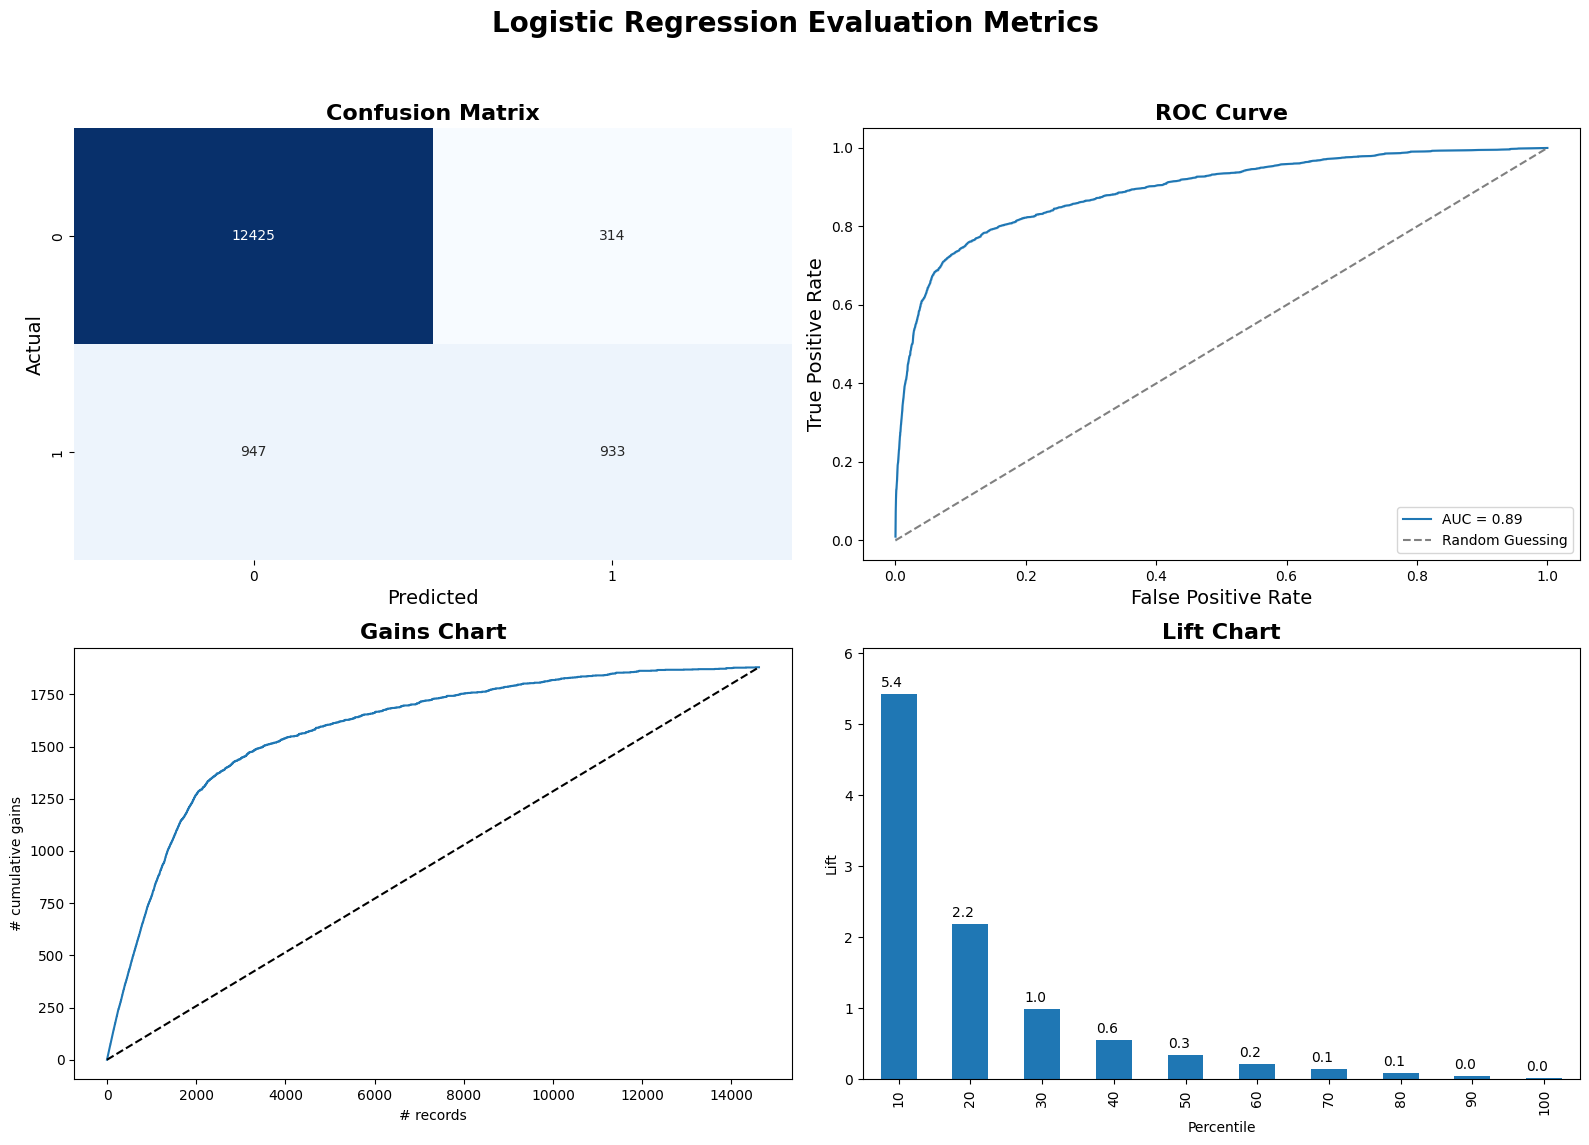

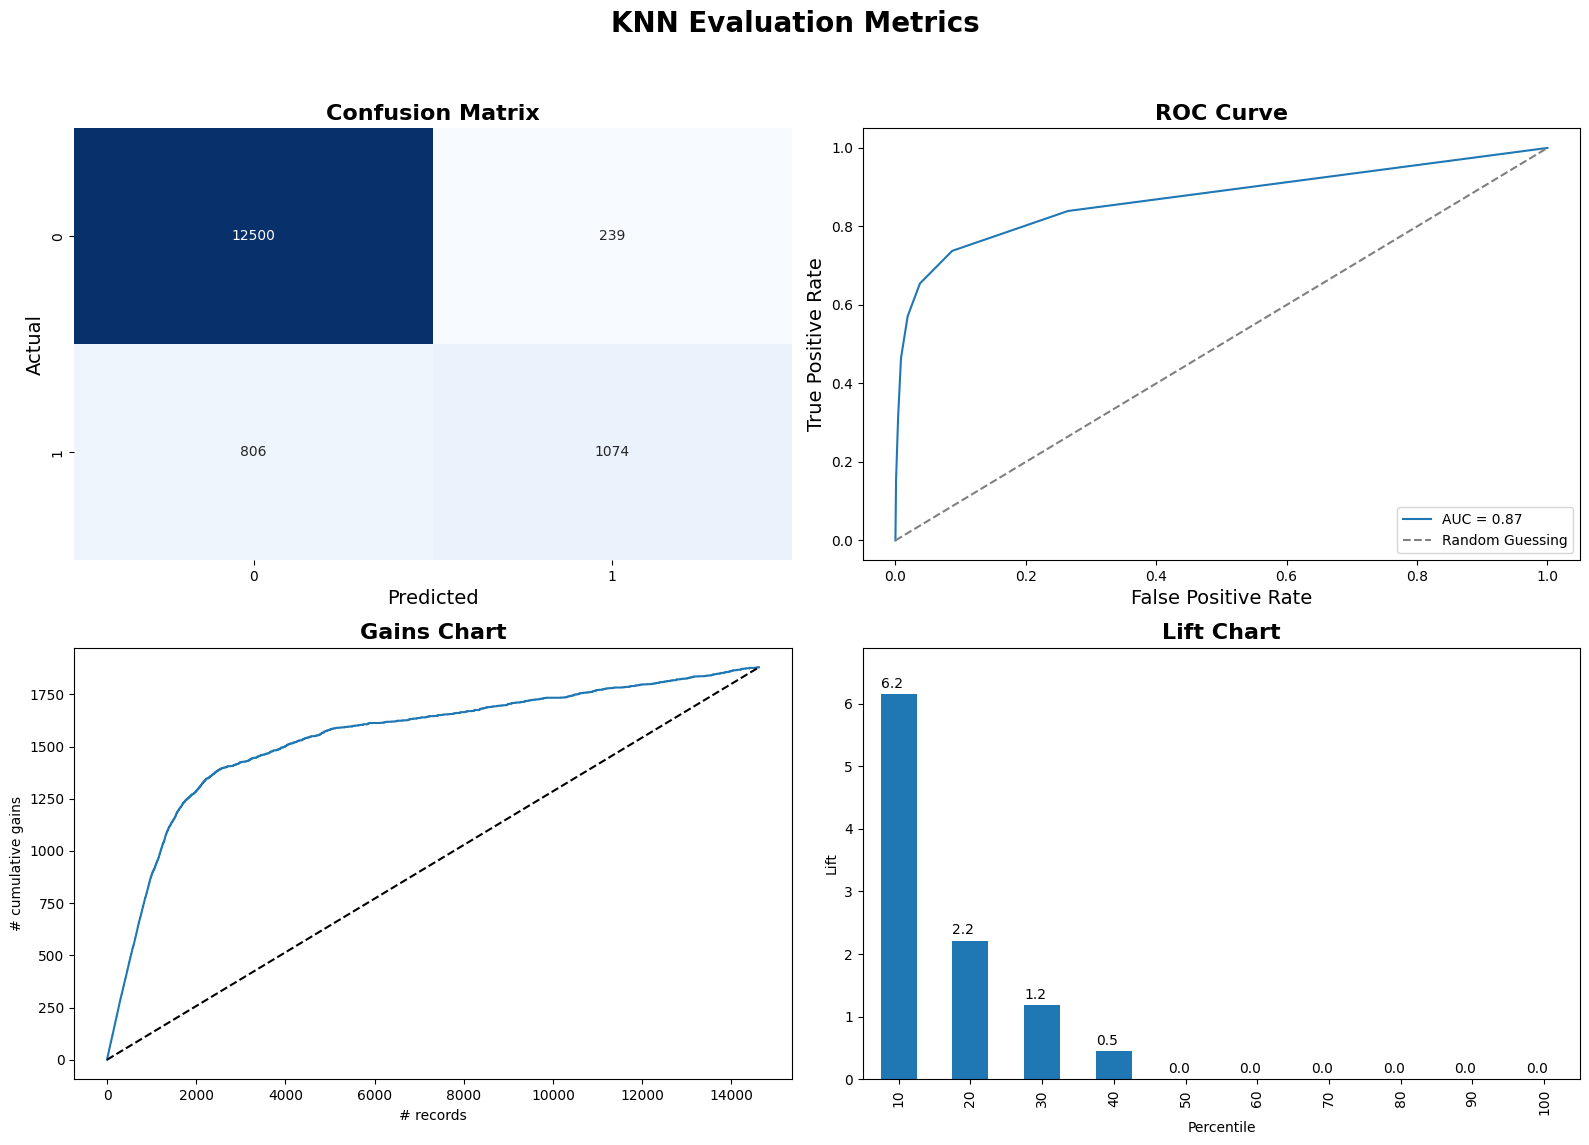

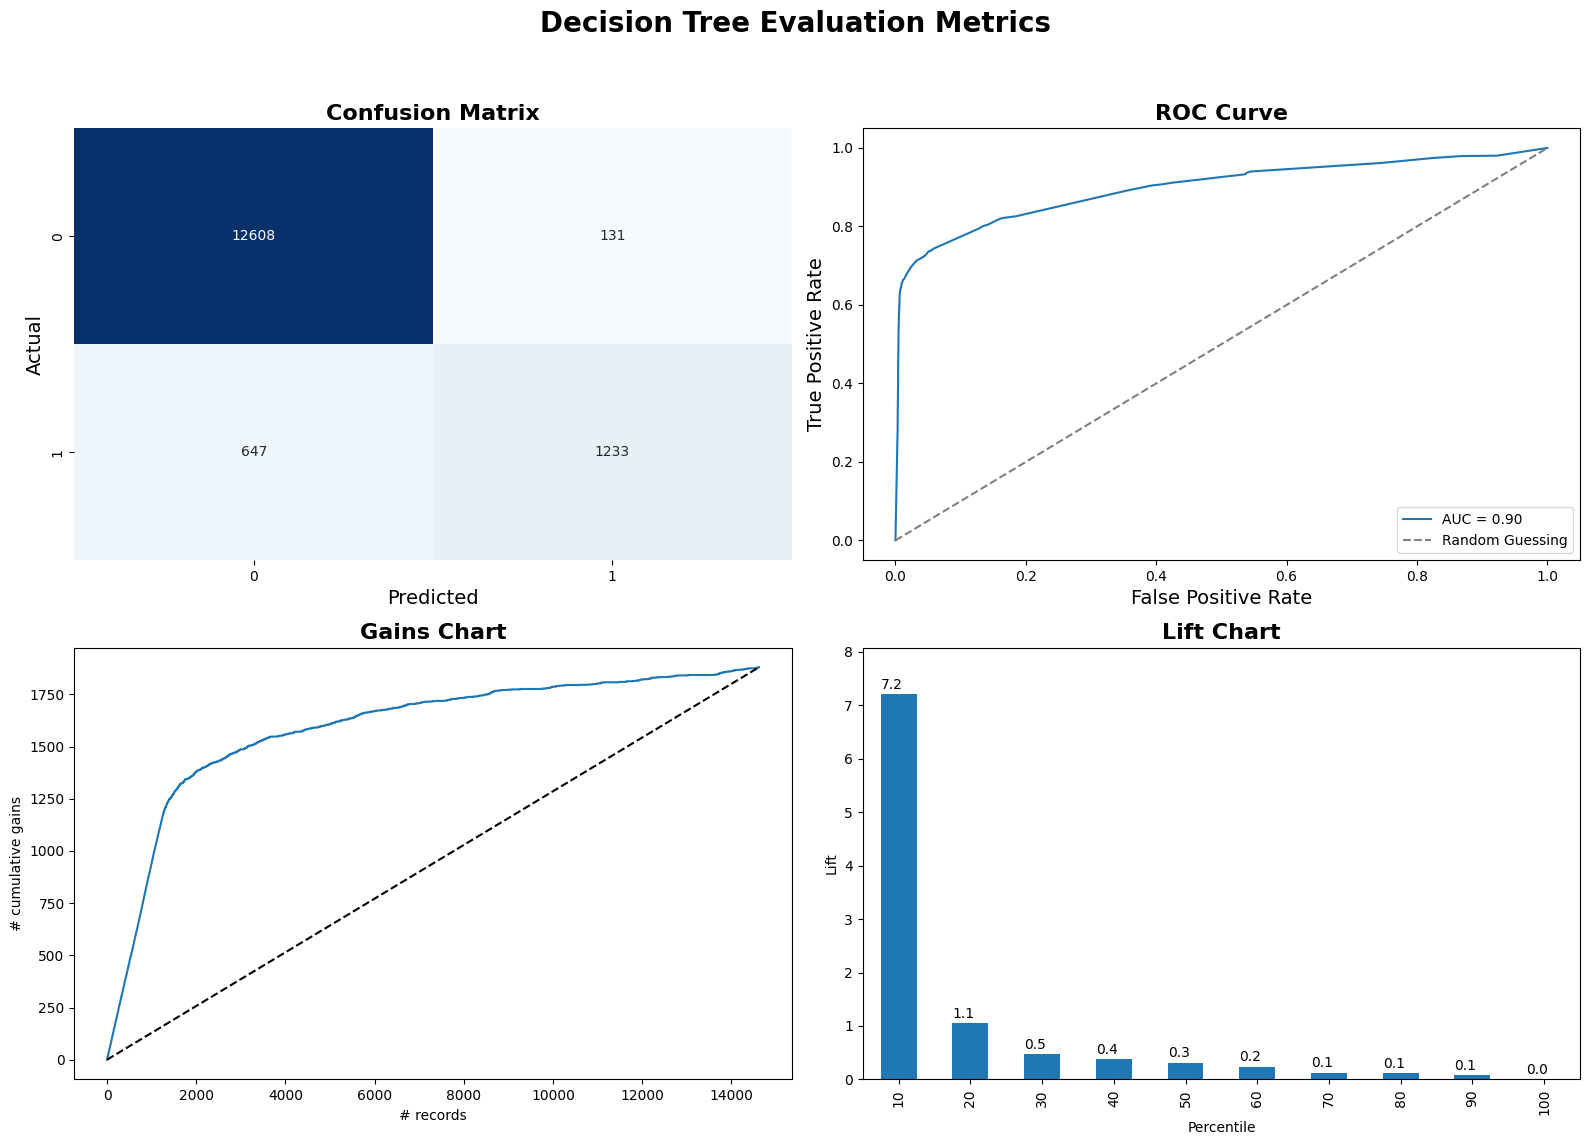

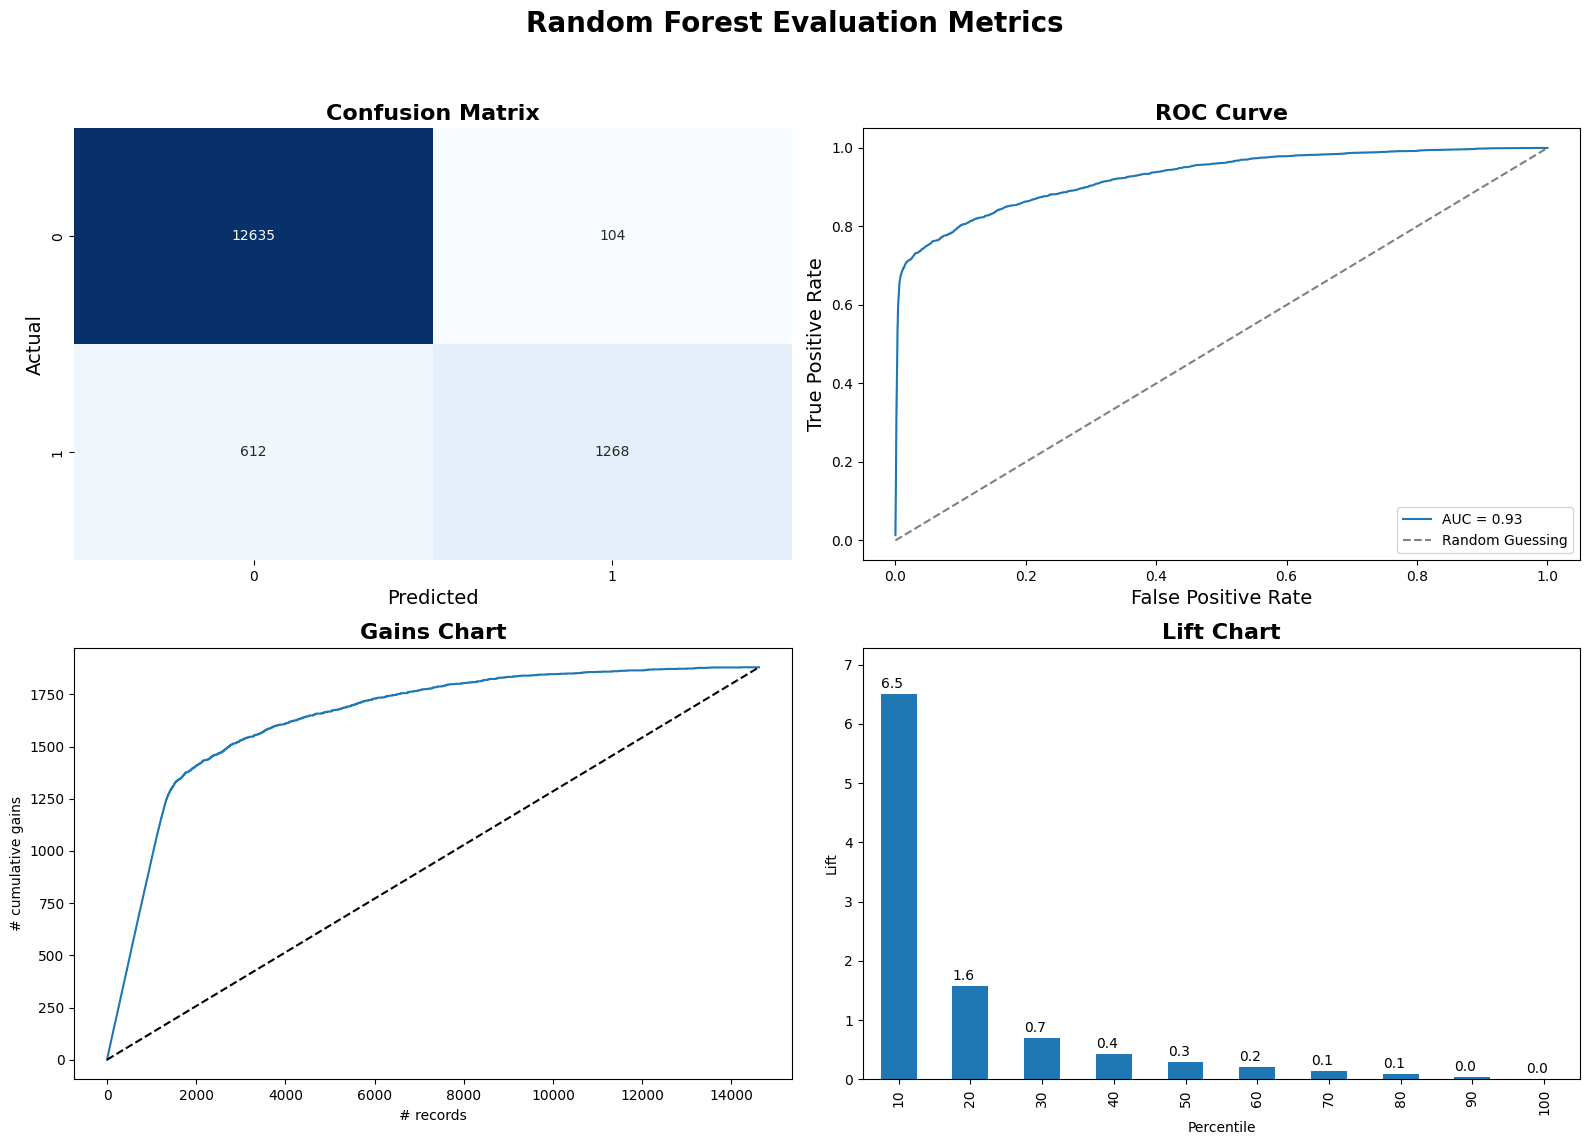

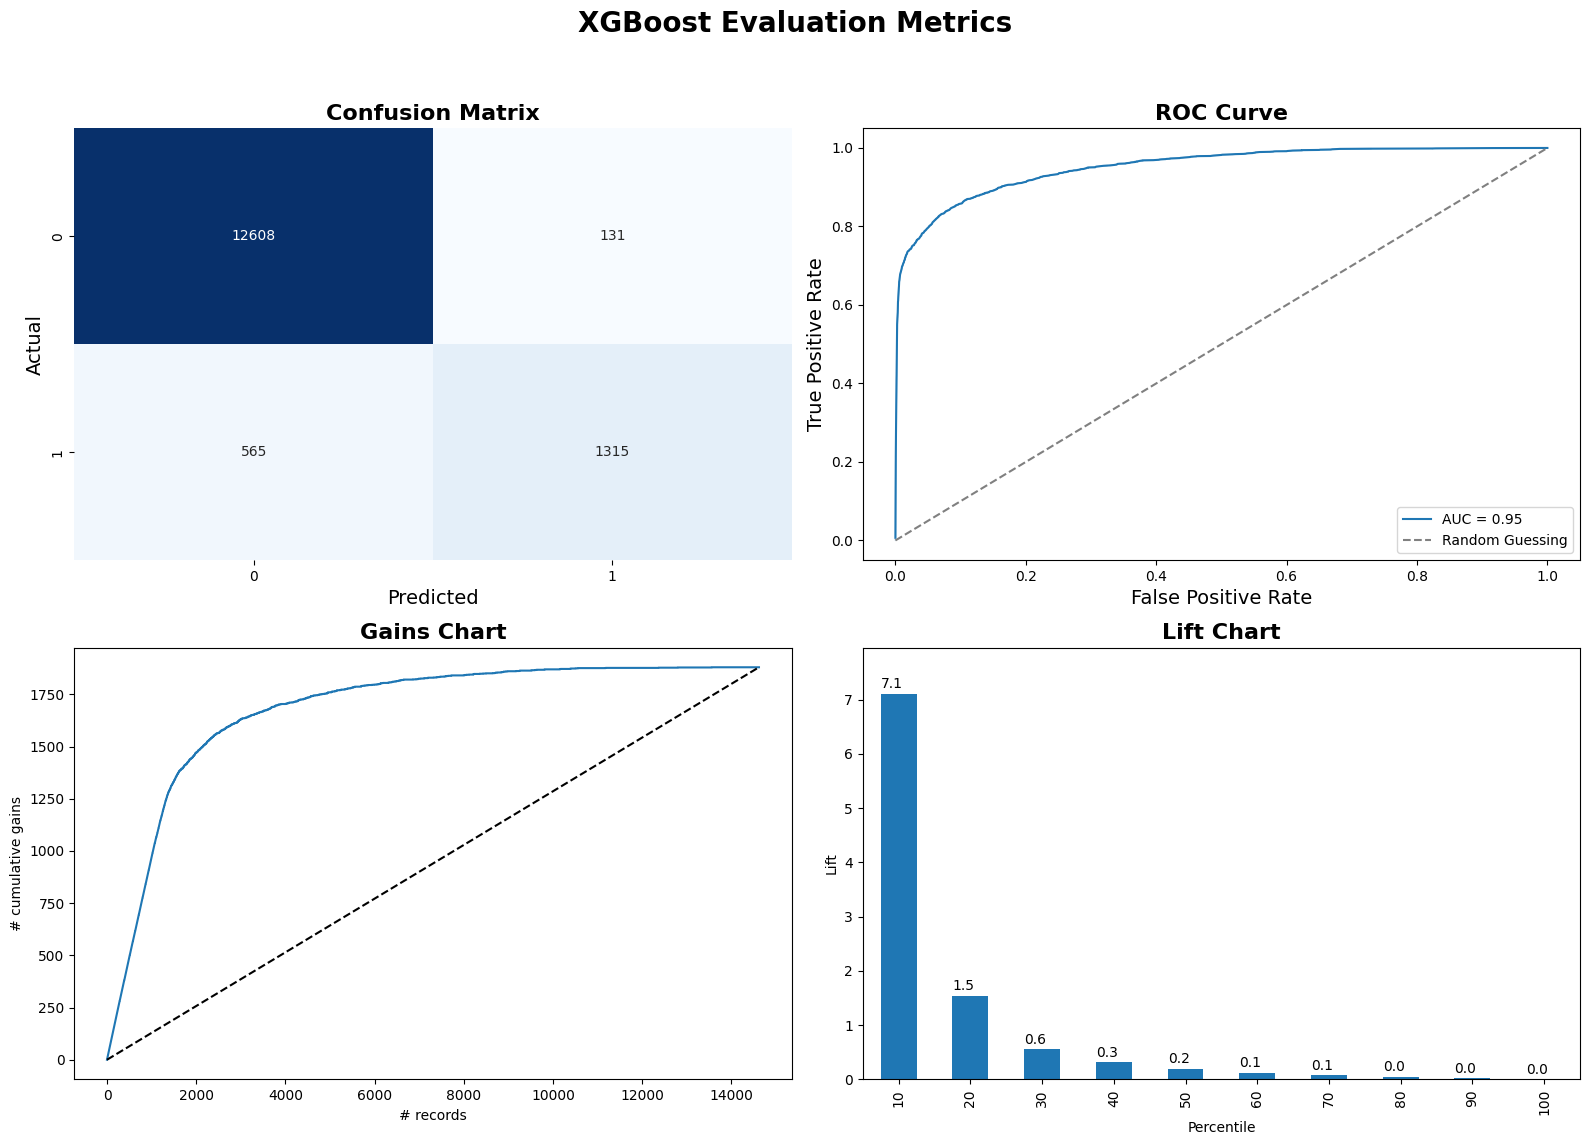

In [263]:
# Evaluate models on the test set using trained_models and datasets_test
test_results = []

for model_name, model in trained_models.items():
    # Skip Perceptron
    if model_name == "Perceptron":
        continue

    # Select the corresponding test set from datasets_test
    X_test_data = datasets_test[model_name]
    
    # Evaluate the model and generate plots
    accuracy, auc_score = evaluate_test_set_with_metrics(model, X_test_data, y_test, model_name)
    
    # Store results
    test_results.append({
        "Model": model_name,
        "Test Accuracy": accuracy,
        "Test ROC-AUC": auc_score
    })

# Convert test results to a DataFrame
test_results_df = pd.DataFrame(test_results)

In [264]:
def evaluate_perceptron(model, X_test, y_test):
    """
    Evaluate a Perceptron model and plot confusion matrix and precision-recall curve.
    """
    # Predict classes and decision scores
    y_pred = model.predict(X_test)
    y_scores = model.decision_function(X_test) if hasattr(model, "decision_function") else None

    # Metrics
    cm = confusion_matrix(y_test, y_pred)

    # Create a 1x2 subplot layout
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Perceptron Evaluation Metrics', fontsize=20, fontweight='bold')

    # Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axs[0])
    axs[0].set_title('Confusion Matrix', fontsize=16, fontweight='bold')
    axs[0].set_xlabel('Predicted', fontsize=14)
    axs[0].set_ylabel('Actual', fontsize=14)

    # Precision-Recall Curve
    if y_scores is not None:
        precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
        sns.lineplot(x=recalls, y=precisions, ax=axs[1])
        axs[1].set_title('Precision-Recall Curve', fontsize=16, fontweight='bold')
        axs[1].set_xlabel('Recall', fontsize=14)
        axs[1].set_ylabel('Precision', fontsize=14)
    else:
        axs[1].text(0.5, 0.5, "No decision scores available", fontsize=14, ha='center', va='center')
        axs[1].set_title('Precision-Recall Curve', fontsize=16, fontweight='bold')
        axs[1].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

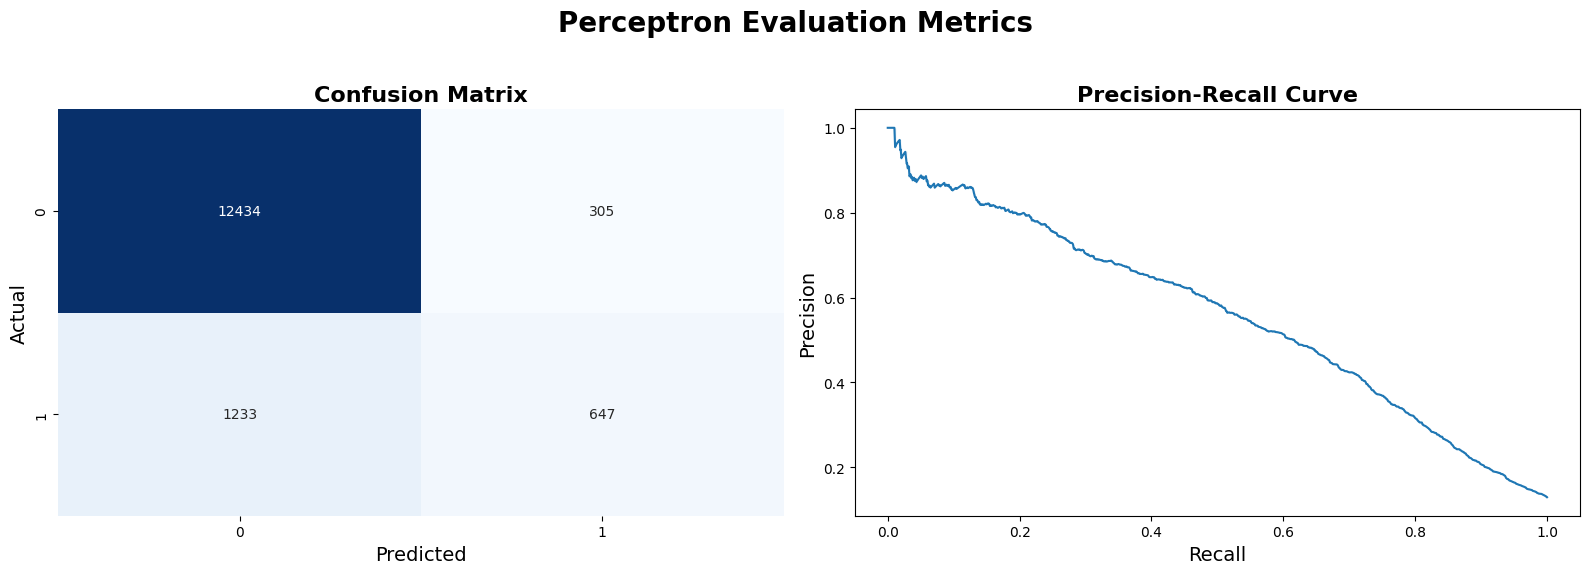

In [265]:
evaluate_perceptron(trained_models["Perceptron"], datasets_test["Perceptron"], y_test)


In [273]:
# Generate predictions for Perceptron
y_pred = trained_models["Perceptron"].predict(datasets_test["Perceptron"])

# Generate the classification report
perceptron_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])

# Print the classification report
print("Classification Report for Perceptron:\n")
print(perceptron_report)

Classification Report for Perceptron:

              precision    recall  f1-score   support

     Class 0       0.91      0.98      0.94     12739
     Class 1       0.68      0.34      0.46      1880

    accuracy                           0.89     14619
   macro avg       0.79      0.66      0.70     14619
weighted avg       0.88      0.89      0.88     14619



In [266]:
test_results_df

,Model,Test Accuracy,Test ROC-AUC
0,Logistic Regression,0.913742,0.891765
1,KNN,0.928518,0.870151
2,Decision Tree,0.946782,0.898265
3,Random Forest,0.951023,0.926597
4,XGBoost,0.952391,0.951767


In [274]:
merged_df = pd.merge(test_results_df, results_df, on="Model")
# Remove Perceptron row
merged_df = merged_df[merged_df["Model"] != "Perceptron"]

In [275]:
merged_df

,Model,Test Accuracy,Test ROC-AUC,Best Params,Best Score
0,Logistic Regression,0.913742,0.891765,{'C': 100},0.918348
1,KNN,0.928518,0.870151,"{'n_neighbors': 7, 'weights': 'uniform'}",0.928462
2,Decision Tree,0.946782,0.898265,"{'max_depth': 10, 'min_samples_split': 10}",0.945526
3,Random Forest,0.951023,0.926597,"{'max_depth': 20, 'n_estimators': 200}",0.950686
4,XGBoost,0.952391,0.951767,"{'learning_rate': 0.2, 'n_estimators': 100}",0.952563
